In [ ]:
import os
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np

# Path where the heart dataset will be saved
HEART_PATH = os.path.join("datasets", "heart")
DATASET_NAME = "aizahzeeshan/heart-failure-dataset"

# Function to fetch the heart data from Kaggle
def fetch_heart_data(heart_path=HEART_PATH):
    # Create the datasets/heart directory if it doesn't exist
    os.makedirs(heart_path, exist_ok=True)

    # Initialize the Kaggle API
    api = KaggleApi()
    api.authenticate()

    # Download the dataset (it will download a zip file)
    api.dataset_download_files(DATASET_NAME, path=heart_path, unzip=False)

    # Define the path to the downloaded zip file
    zip_path = os.path.join(heart_path, "heart-failure-dataset.zip")

    # Unzip the dataset
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(heart_path)

    print(f"Heart dataset extracted to {heart_path}")

# Function to load the heart.csv data into a pandas DataFrame
def load_heart_data(heart_path=HEART_PATH):
    csv_path = os.path.join(heart_path, "heart.csv")  # Adjust if filename is different
    return pd.read_csv(csv_path)

# Fetch the heart data
fetch_heart_data()

# Load the data
heart_data = load_heart_data()
print(heart_data.head())
print(heart_data.describe())

Dataset URL: https://www.kaggle.com/datasets/aizahzeeshan/heart-failure-dataset
Heart dataset extracted to datasets\heart
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.0000

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


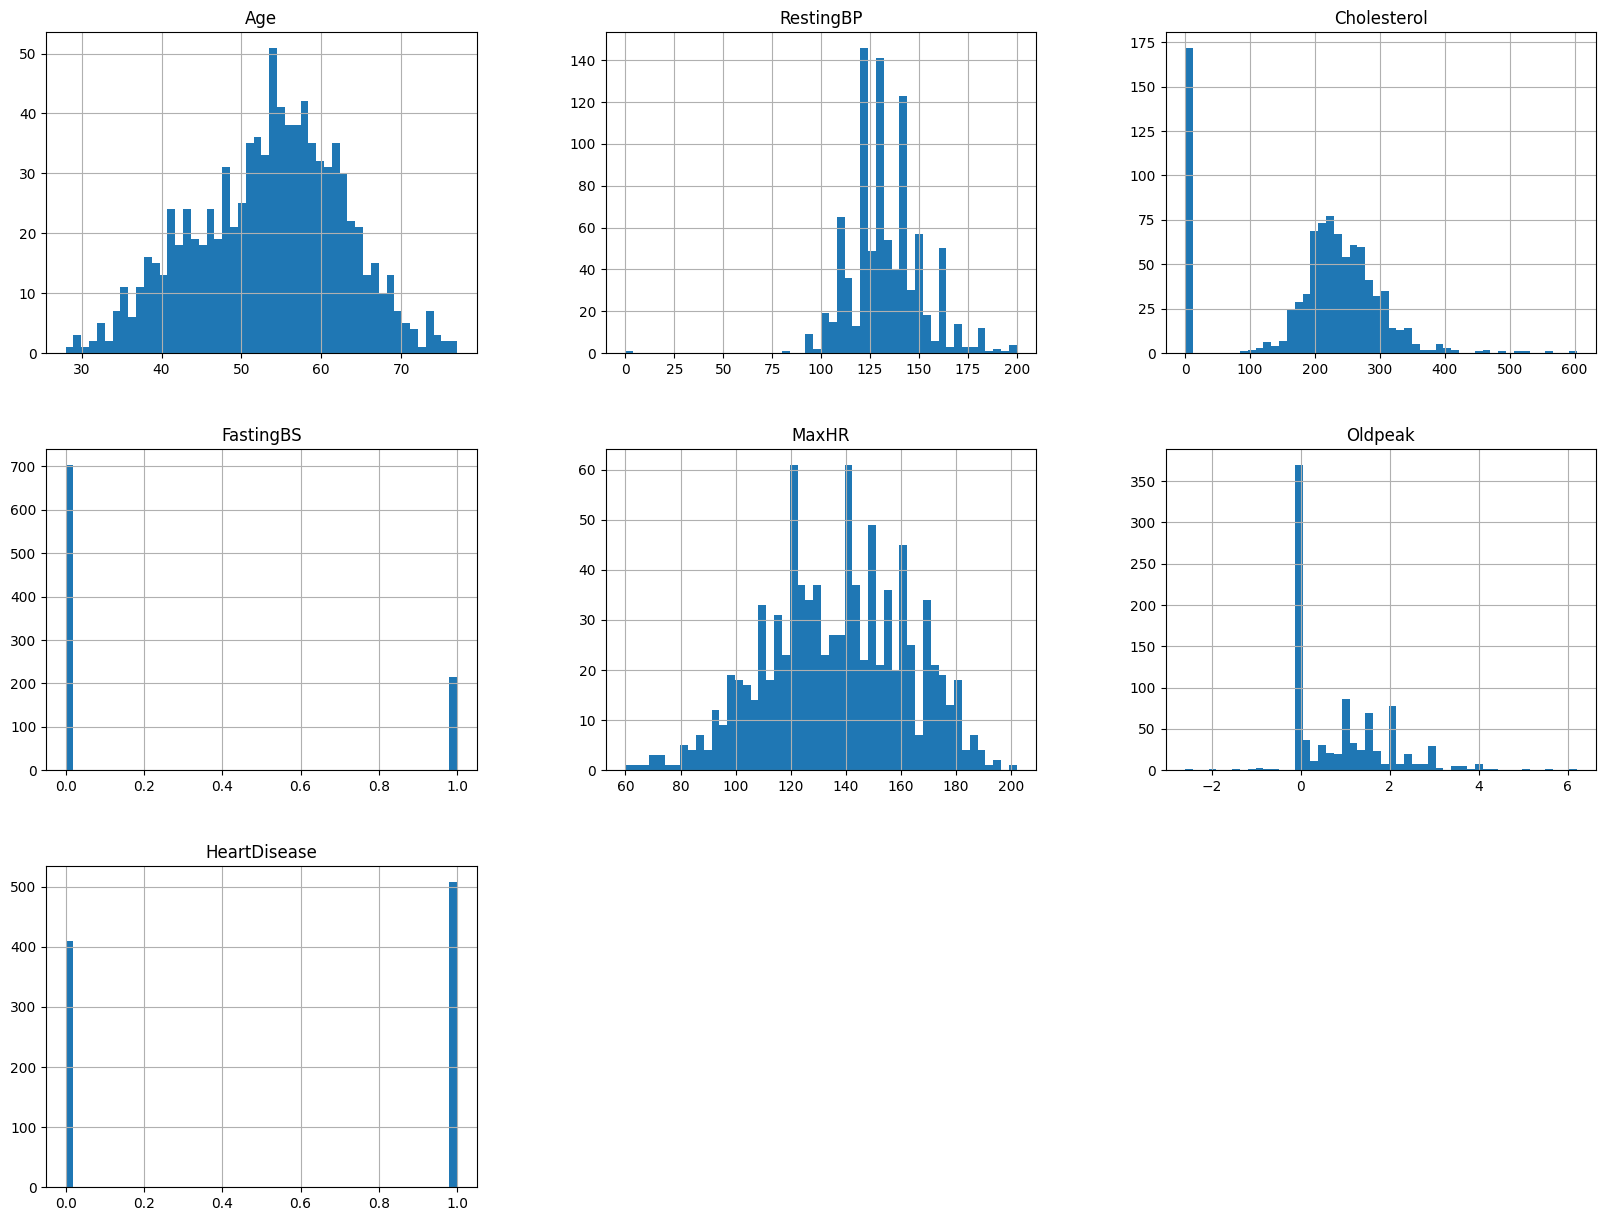

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
heart_data.hist(bins=50, figsize=(20,15))
plt.show()

In [27]:
np.random.seed(42)


In [ ]:
import numpy as np

import pandas as pd

# Function to split the data into training and test sets
def split_train_test(data, test_ratio):
    # Shuffle the indices of the dataset
    shuffled_indices = np.random.permutation(len(data))

    # Calculate the size of the test set
    test_set_size = int(len(data) * test_ratio)

    # Select indices for the test and training sets
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    # Return the training and test sets
    return data.iloc[train_indices], data.iloc[test_indices]

# Example usage with heart_data
train_data, test_data = split_train_test(heart_data, 0.2)  # 20% test data, 80% train data

# Checking the results
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 735
Test set size: 183


In [ ]:
import numpy as np
import pandas as pd
import zlib
from sklearn.model_selection import train_test_split

# Add a synthetic 'id' column based on the index of the rows
heart_data['id'] = heart_data.index

# Function to check if an identifier should be in the test set
def test_set_check(identifier, test_ratio):
    return zlib.crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

# Function to split the data into training and test sets based on a unique identifier
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Example usage with heart_data and synthetic 'id' column
train_data, test_data = split_train_test_by_id(heart_data, 0.2, 'id')

# Checking the results
print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Display the first few rows of both sets
train_data.head(), test_data.head()


Training set size: 736
Test set size: 182


(   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
 0   40   M           ATA        140          289          0     Normal    172   
 1   49   F           NAP        160          180          0     Normal    156   
 3   48   F           ASY        138          214          0     Normal    108   
 4   54   M           NAP        150          195          0     Normal    122   
 6   45   F           ATA        130          237          0     Normal    170   
 
   ExerciseAngina  Oldpeak ST_Slope  HeartDisease  id  
 0              N      0.0       Up             0   0  
 1              N      1.0     Flat             1   1  
 3              Y      1.5     Flat             1   3  
 4              N      0.0       Up             0   4  
 6              N      0.0       Up             0   6  ,
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
 2    37   M           ATA        130          283          0         ST   
 5    39   M     

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import zlib


# Checking for missing values
print(heart_data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
id                0
dtype: int64


In [ ]:
# --------------------------- 2. Correlation Analysis ---------------------------
# Selecting only the numerical columns for correlation analysis
numerical_cols = heart_data.select_dtypes(include=['int64', 'float64']).columns
correlations = heart_data[numerical_cols].corr()

# Displaying the correlations with respect to 'HeartDisease'
print(correlations['HeartDisease'].sort_values(ascending=False))

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
id              0.055109
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


In [ ]:
# --------------------------- 3. Data Encoding for Categorical Columns ---------------------------
# Creating a copy of the dataset
heart_data_encoded = heart_data.copy()

# Encoding categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    le = LabelEncoder()
    heart_data_encoded[col] = le.fit_transform(heart_data_encoded[col])

# Calculate correlations including encoded categorical variables
correlations_encoded = heart_data_encoded.corr()
print(correlations_encoded['HeartDisease'].sort_values(ascending=False))

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
id                0.055109
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


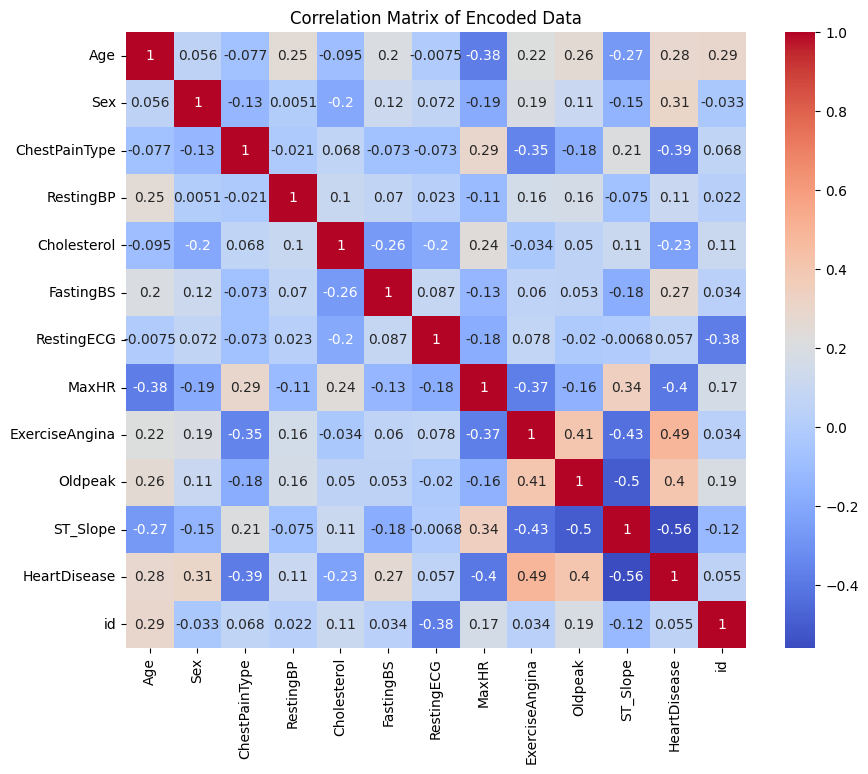

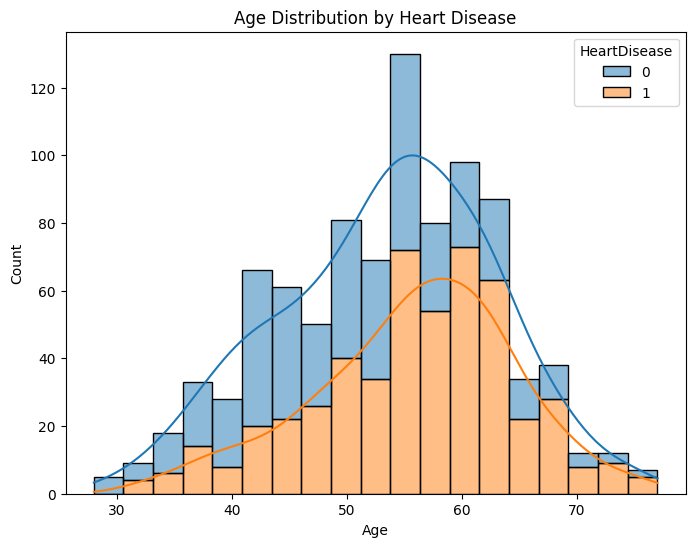

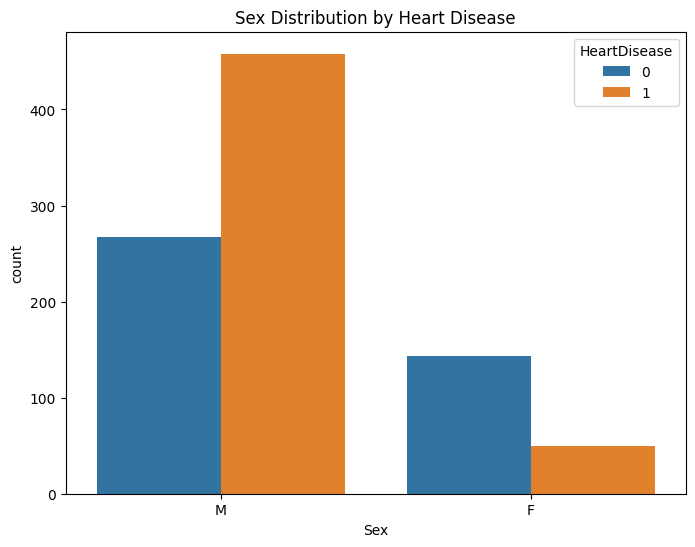

In [ ]:
# --------------------------- 4. Data Visualization ---------------------------
# Plotting the correlation matrix for encoded data
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_encoded, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Encoded Data')
plt.show()

# Age distribution by heart disease
plt.figure(figsize=(8, 6))
sns.histplot(data=heart_data, x='Age', hue='HeartDisease', multiple='stack', kde=True)
plt.title('Age Distribution by Heart Disease')
plt.show()

# Count plot for 'Sex' distribution by heart disease
plt.figure(figsize=(8, 6))
sns.countplot(data=heart_data, x='Sex', hue='HeartDisease')
plt.title('Sex Distribution by Heart Disease')
plt.show()

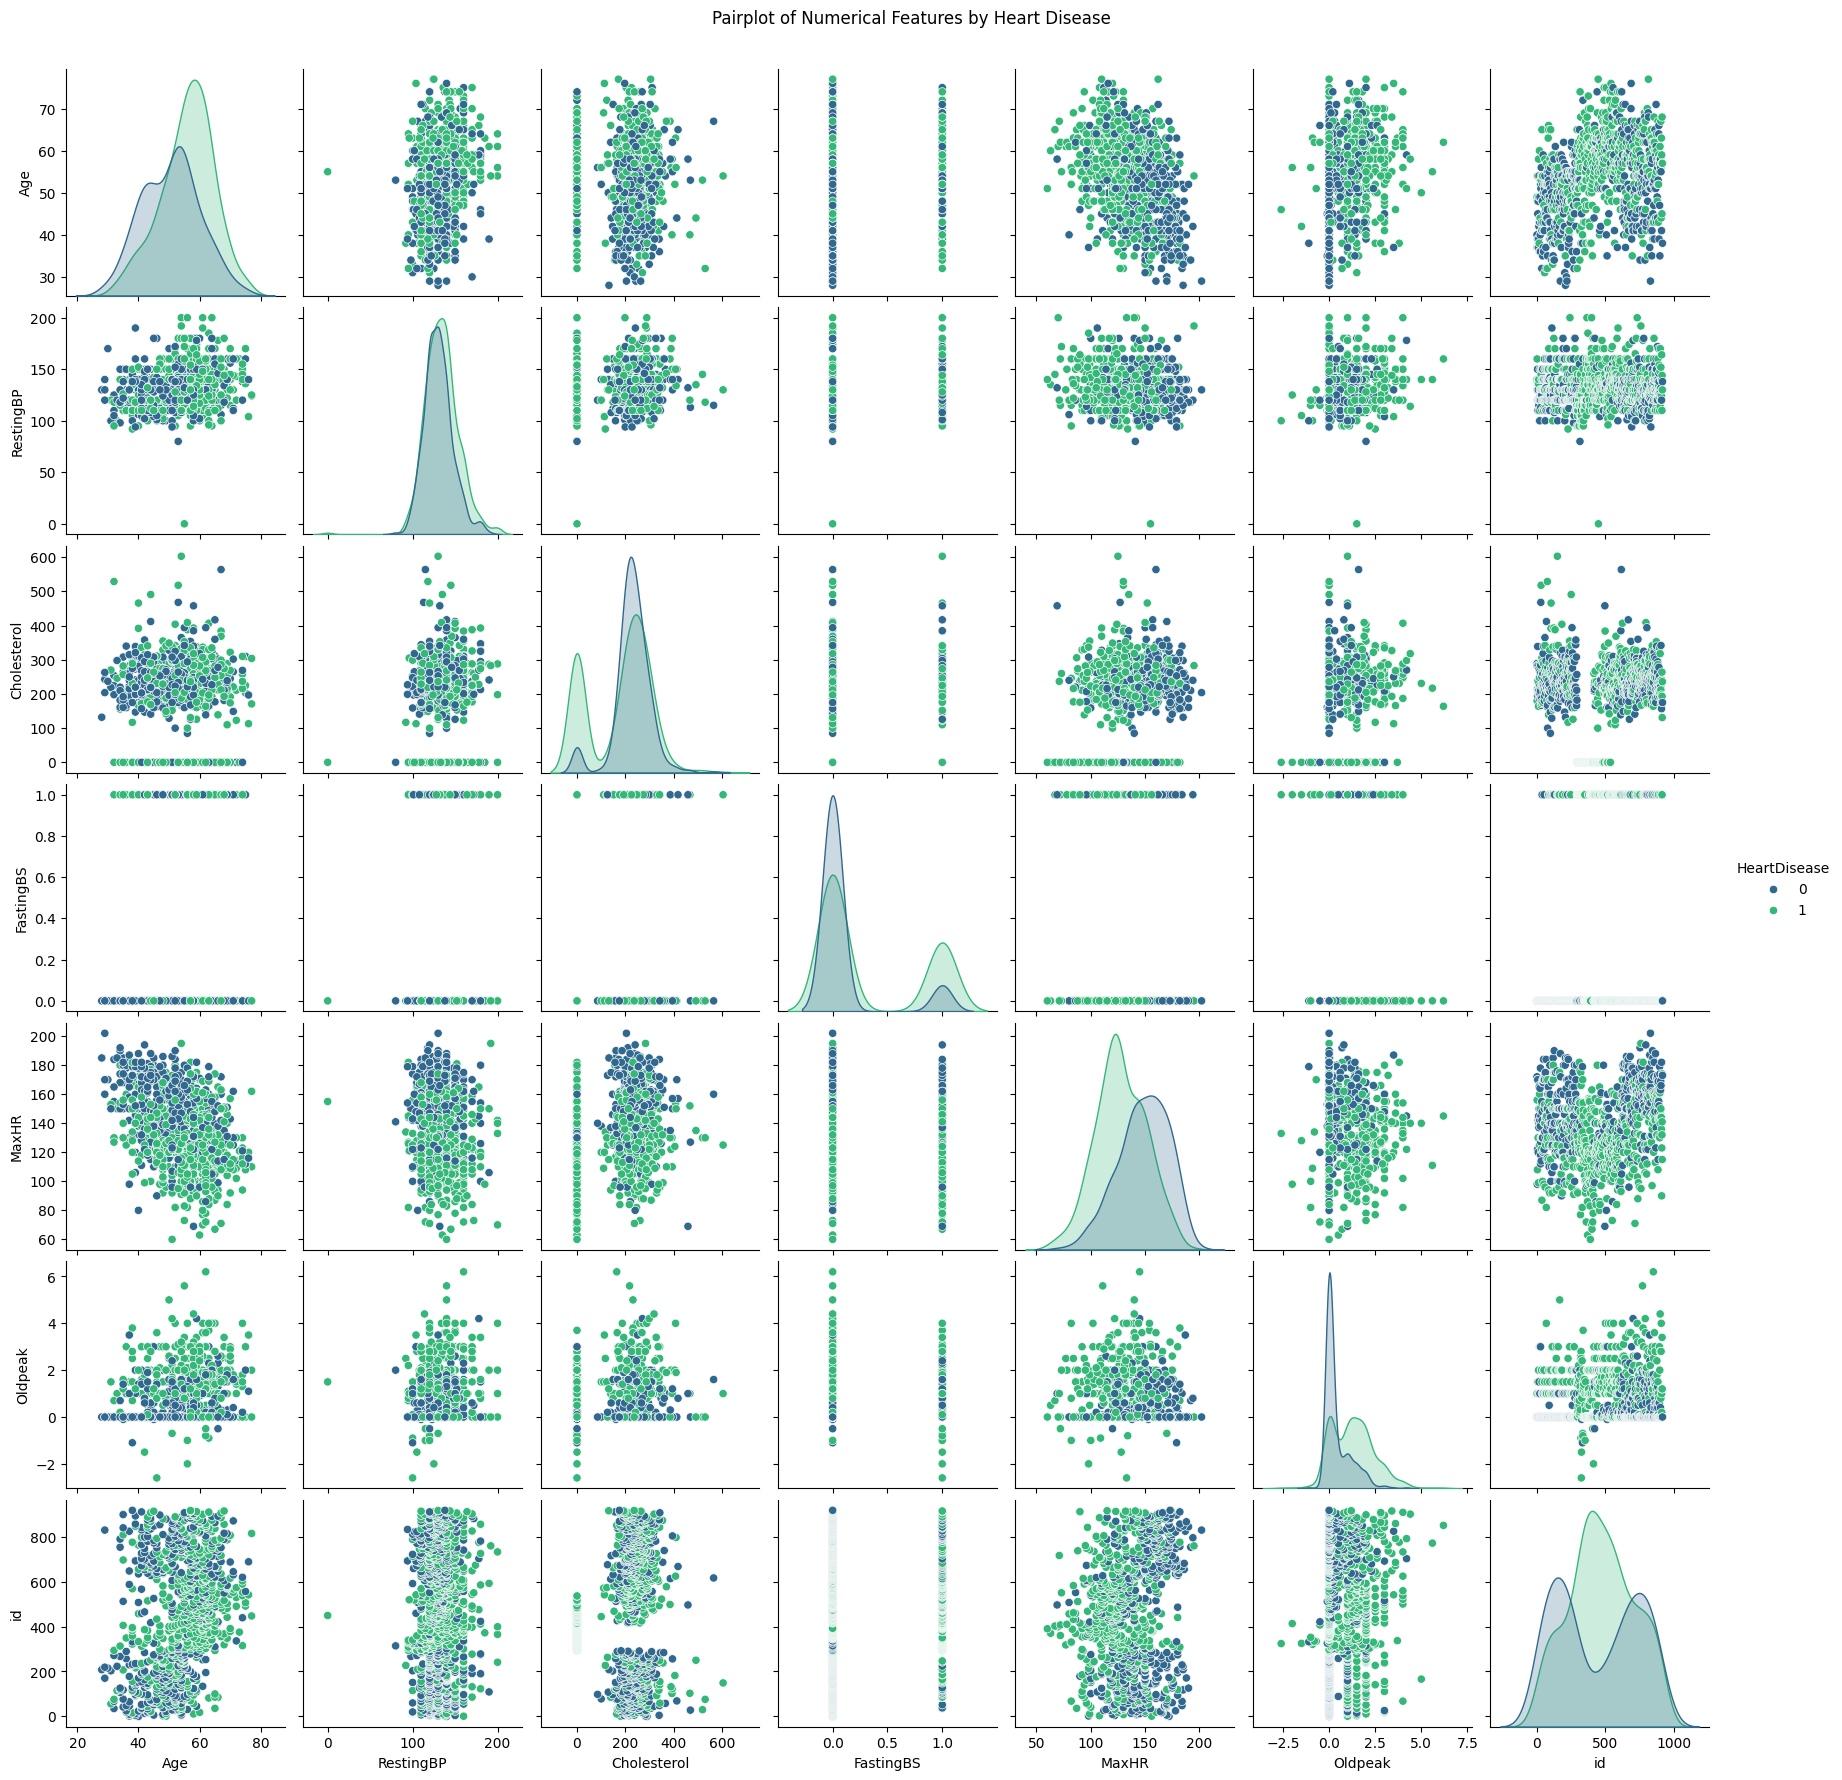

In [ ]:
# --------------------------- 4. Data Visualization ---------------------------
# Scatter plots for possible combinations of numerical features
sns.pairplot(heart_data, hue='HeartDisease', diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Numerical Features by Heart Disease', y=1.02)
plt.show()


In [ ]:
# --------------------------- 5. Preprocessing for Machine Learning ---------------------------
# Separating features and target variable
X = heart_data_encoded.drop('HeartDisease', axis=1)
y = heart_data_encoded['HeartDisease']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



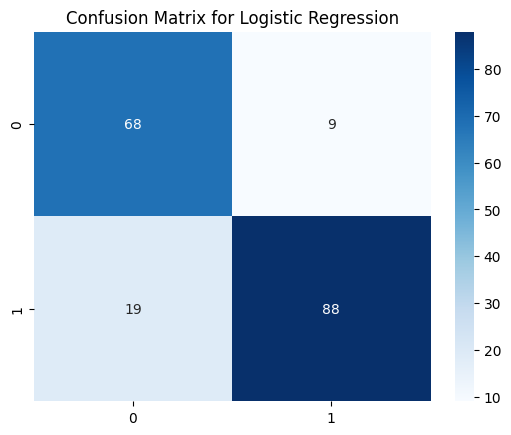

In [ ]:
# --------------------------- 6. Building Logistic Regression Model ---------------------------
# Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Model evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# --------------------------- 7. Building Random Forest Model ---------------------------
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8858695652173914
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [ ]:
# --------------------------- 8. Making Predictions ---------------------------
# Assuming you want to make predictions on the test set

# Predictions with Logistic Regression
y_pred_logistic = model.predict(X_test_scaled)

# Predictions with Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Display predictions
print("Logistic Regression Predictions:")
print(y_pred_logistic)

print("\nRandom Forest Predictions:")
print(y_pred_rf)


Logistic Regression Predictions:
[0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1]

Random Forest Predictions:
[0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1
 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1]


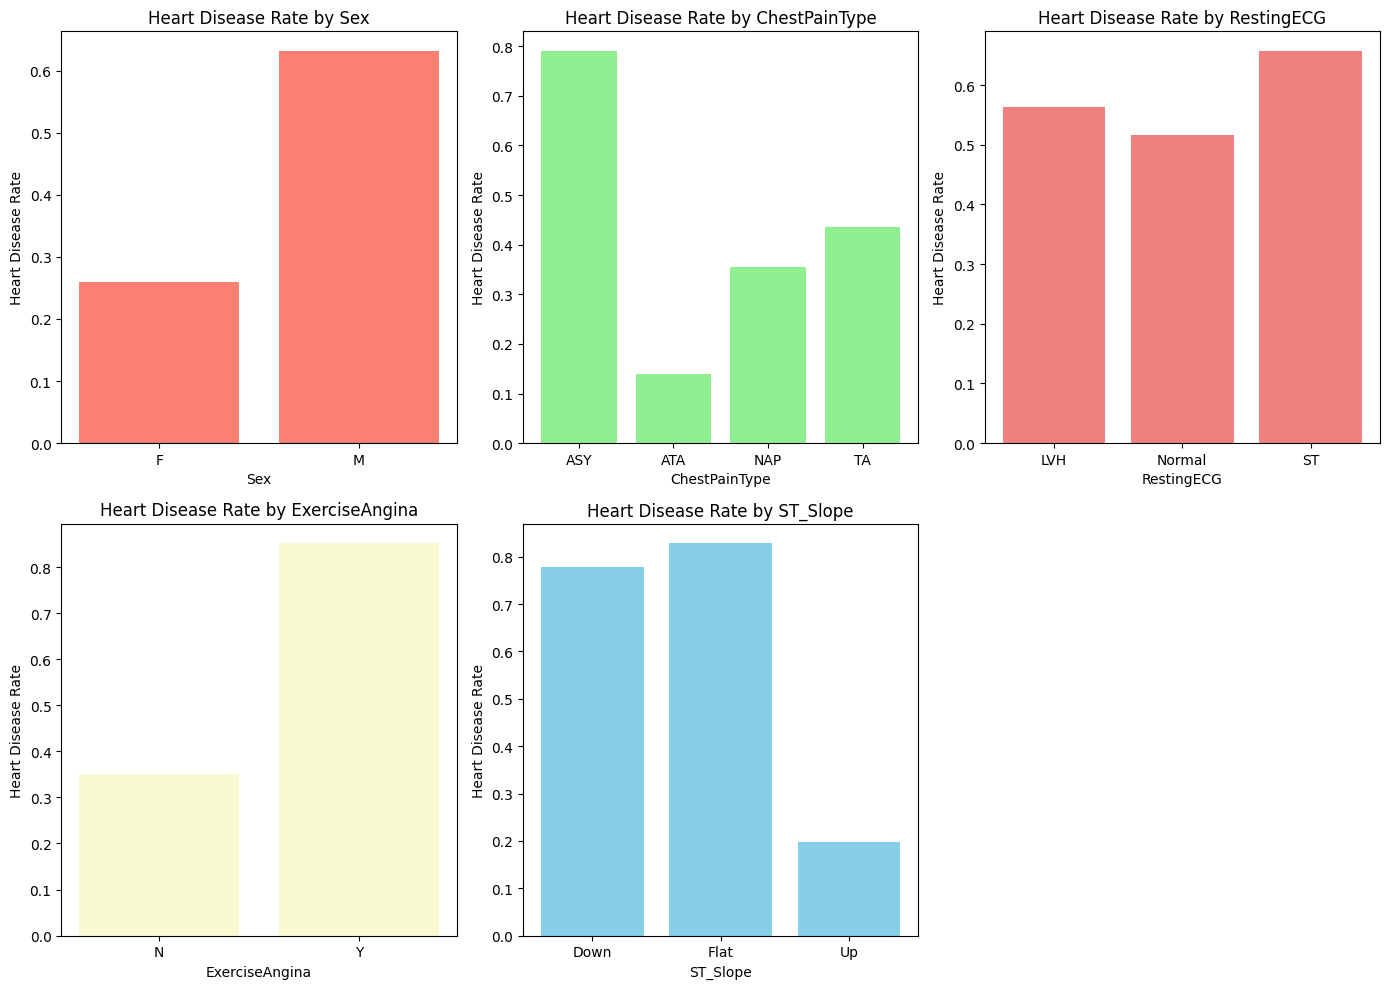

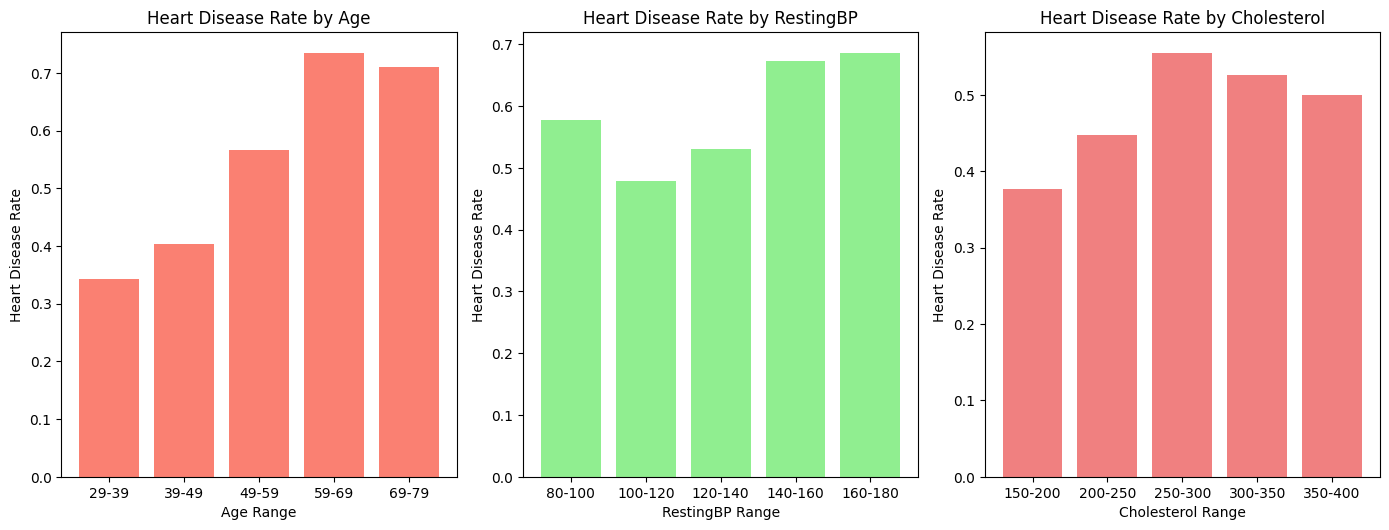

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define categorical and numerical columns again if necessary
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol']  # Include other numerical columns if present

# --------------------------- 10. Visualizing Heart Disease Rate by Individual Factors ---------------------------

# 1. Visualization for Categorical Features
plt.figure(figsize=(14, 10))

colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow']

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid as needed
    heart_disease_rate = heart_data.groupby(col, observed=True)['HeartDisease'].mean().reset_index()
    plt.bar(heart_disease_rate[col], heart_disease_rate['HeartDisease'], color=colors[i % len(colors)])
    plt.title(f'Heart Disease Rate by {col}')
    plt.xlabel(col)
    plt.ylabel('Heart Disease Rate')

plt.tight_layout()
plt.show()

# 2. Visualization for Numerical Features
plt.figure(figsize=(14, 10))

# Define bins for numerical features
bins = {
    'Age': [29, 39, 49, 59, 69, 79],
    'RestingBP': [80, 100, 120, 140, 160, 180],
    'Cholesterol': [150, 200, 250, 300, 350, 400]
}

for i, col in enumerate(numerical_cols, 1):
    if col in bins:
        # Create binned feature
        heart_data[f'{col}_bin'] = pd.cut(heart_data[col], bins=bins[col], labels=[f'{x}-{y}' for x, y in zip(bins[col][:-1], bins[col][1:])])
        heart_disease_rate = heart_data.groupby(f'{col}_bin', observed=True)['HeartDisease'].mean().reset_index()
        plt.subplot(2, 3, i)  # Adjust the subplot grid as needed
        plt.bar(heart_disease_rate[f'{col}_bin'], heart_disease_rate['HeartDisease'], color=colors[i % len(colors)])
        plt.title(f'Heart Disease Rate by {col}')
        plt.xlabel(f'{col} Range')
        plt.ylabel('Heart Disease Rate')
        heart_data.drop(columns=[f'{col}_bin'], inplace=True)  # Clean up temporary column
    else:
        heart_disease_rate = heart_data.groupby(col, observed=True)['HeartDisease'].mean().reset_index()
        plt.subplot(2, 3, i)  # Adjust the subplot grid as needed
        plt.plot(heart_disease_rate[col], heart_disease_rate['HeartDisease'], marker='o', color=colors[i % len(colors)])
        plt.title(f'Heart Disease Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Heart Disease Rate')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
data = pd.read_csv(r"C:\Users\SAI VAMSI\Desktop\mlass1\venv\datasets\heart\heart.csv")

# Display the data types to identify categorical columns
print("Data Types:")
print(data.dtypes)

# Convert categorical variables to dummy variables (one-hot encoding)
# Exclude the target column from encoding
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define the target column
target_column = 'HeartDisease'

# Separate features and target variable
X = data_encoded.drop(target_column, axis=1)
y = data_encoded[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': report}
    print(f"Completed {name}")

# Compare Model Performance
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {metrics['accuracy']:.2f}")
    print("Classification Report:")
    print(metrics['classification_report'])
    print("-" * 60)


Data Types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
Training Random Forest...
Completed Random Forest
Training Support Vector Machine...
Completed Support Vector Machine
Training Logistic Regression...
Completed Logistic Regression
Training K-Nearest Neighbors...
Completed K-Nearest Neighbors
Model: Random Forest
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

----------------------------------

<Figure size 1400x1400 with 0 Axes>

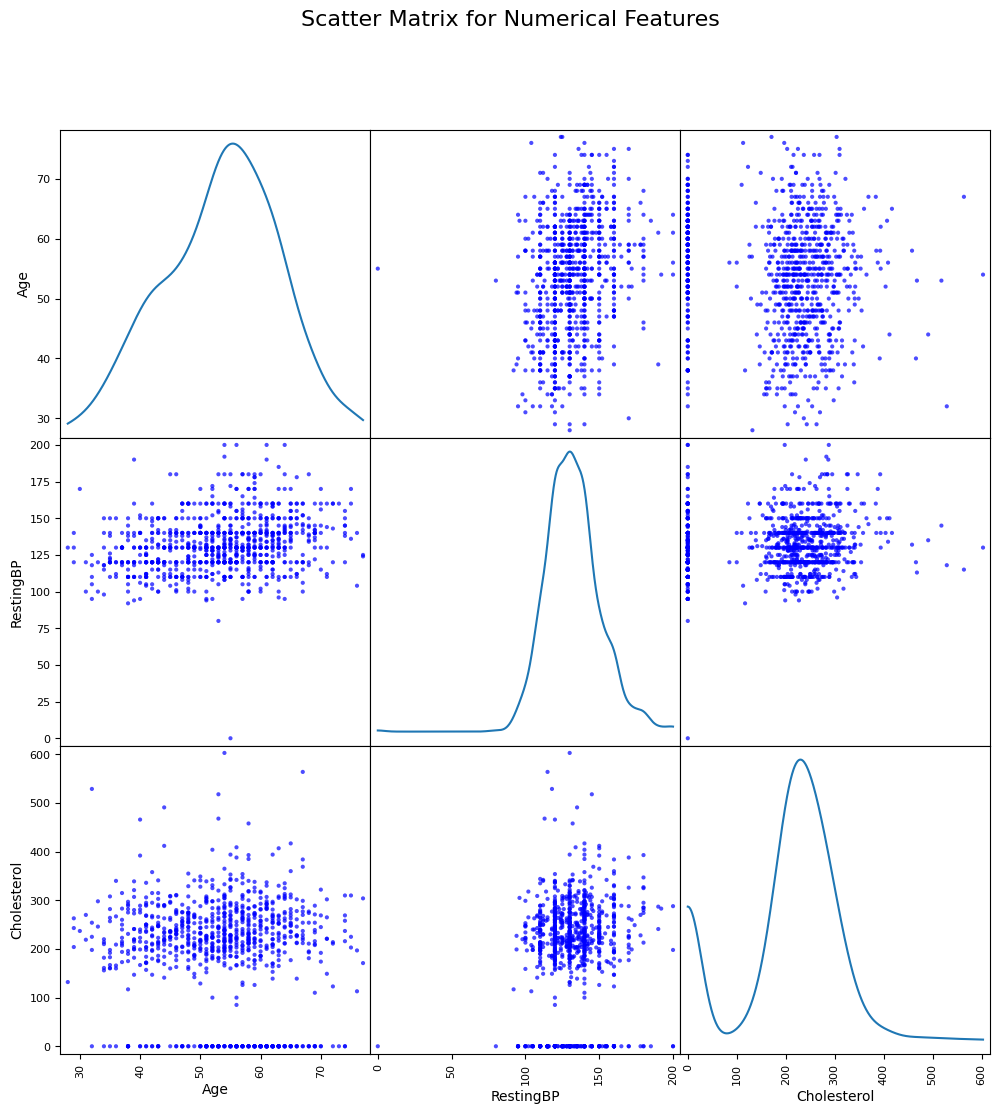

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

heart_data = pd.read_csv(r"C:\Users\SAI VAMSI\Desktop\mlass1\venv\datasets\heart\heart.csv")

# Select only numerical columns for the scatter matrix
numerical_cols = ['Age', 'RestingBP', 'Cholesterol']  # Add other relevant numerical columns as needed

# Create the scatter matrix plot
plt.figure(figsize=(14, 14))  # Adjust the figure size as necessary
scatter_matrix(heart_data[numerical_cols], figsize=(12, 12), diagonal='kde', alpha=0.7, color='b')

# Display the plot
plt.suptitle("Scatter Matrix for Numerical Features", fontsize=16)
plt.show()


In [25]:


from pycaret.classification import *
import pandas as pd
import os

# Upload kaggle.json (ensure you have this API key file from your Kaggle account)
from google.colab import files
files.upload()

# Move kaggle.json to the appropriate location and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle API
api = KaggleApi()
api.authenticate()
api.dataset_download_files('aizahzeeshan/heart-failure-dataset')

# Unzip the downloaded dataset
with zipfile.ZipFile('heart-failure-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('heart-failure-dataset')

# Load the dataset
# Replace 'heart.csv' with the actual name of the CSV file from the downloaded dataset
data = pd.read_csv('heart-failure-dataset/heart.csv')


# Set up the PyCaret environment
clf_setup = setup(data=data, target='HeartDisease')

# Compare different models and get the best model
best_model = compare_models()

# Print out the best model
print(best_model)




Saving kaggle.json to kaggle (3).json
Dataset URL: https://www.kaggle.com/datasets/aizahzeeshan/heart-failure-dataset


,Description,Value
0,Session id,5264
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 19)"
5,Transformed train set shape,"(642, 19)"
6,Transformed test set shape,"(276, 19)"
7,Numeric features,6
8,Categorical features,5
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8613,0.9210,0.9043,0.8553,0.8784,0.7175,0.7206,0.3440
lightgbm,Light Gradient Boosting Machine,0.8536,0.9293,0.8790,0.8610,0.8690,0.7030,0.7052,0.6780
ridge,Ridge Classifier,0.8504,0.9195,0.8814,0.8538,0.8668,0.6962,0.6981,0.1380
lda,Linear Discriminant Analysis,0.8504,0.9196,0.8814,0.8538,0.8668,0.6962,0.6981,0.1260
lr,Logistic Regression,0.8488,0.9209,0.8842,0.8491,0.8658,0.6927,0.6947,0.8090
gbc,Gradient Boosting Classifier,0.8473,0.9200,0.8785,0.8515,0.8638,0.6899,0.6927,0.2910
ada,Ada Boost Classifier,0.8443,0.8942,0.8731,0.8515,0.8613,0.6838,0.6858,0.4320
nb,Naive Bayes,0.8379,0.9113,0.8620,0.8484,0.8545,0.6716,0.6730,0.2080
et,Extra Trees Classifier,0.8364,0.9136,0.8706,0.8405,0.8545,0.6678,0.6699,0.2980
xgboost,Extreme Gradient Boosting,0.8316,0.9137,0.8702,0.8334,0.8508,0.6577,0.6597,0.1880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=5264, verbose=0,
                       warm_start=False)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Load the data (assuming the CSV is already loaded in the 'data' variable)
# Replace 'HeartDisease' with the actual target column name
X = data.drop('HeartDisease', axis=1)  # 'HeartDisease' is the target column
y = data['HeartDisease']

# Preprocessing for numerical data (impute missing values and scale)
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing for categorical data (impute missing values and one-hot encode)
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine numerical and categorical transformers into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the preprocessing pipeline
X_preprocessed = preprocessor.fit_transform(X)

# Label encoding for the target variable (if needed)
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# The rest of your code (model training, hyperparameter tuning, etc.) should work without modification


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Accuracy:  0.8913043478260869
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       112
           1       0.92      0.89      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



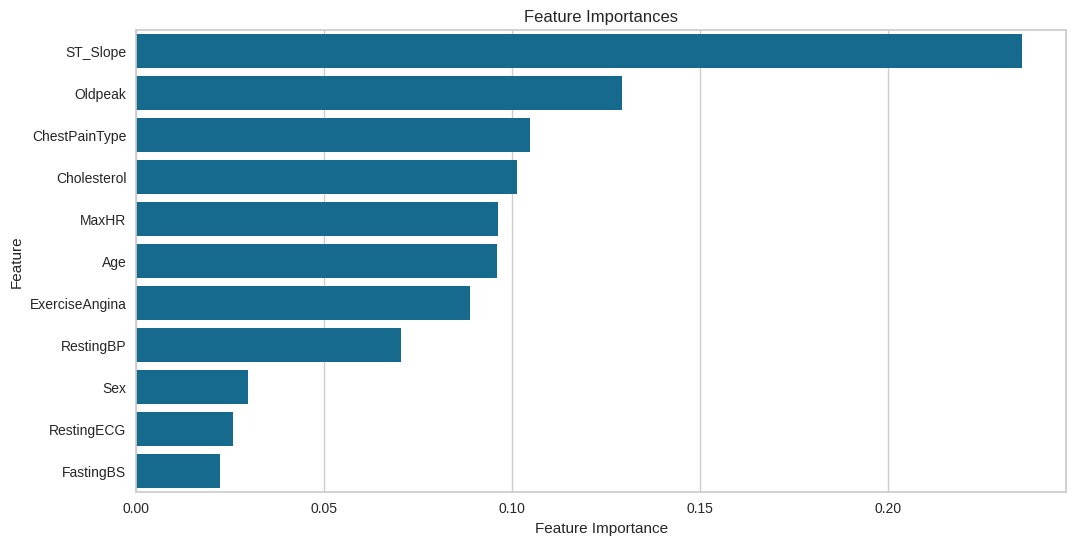

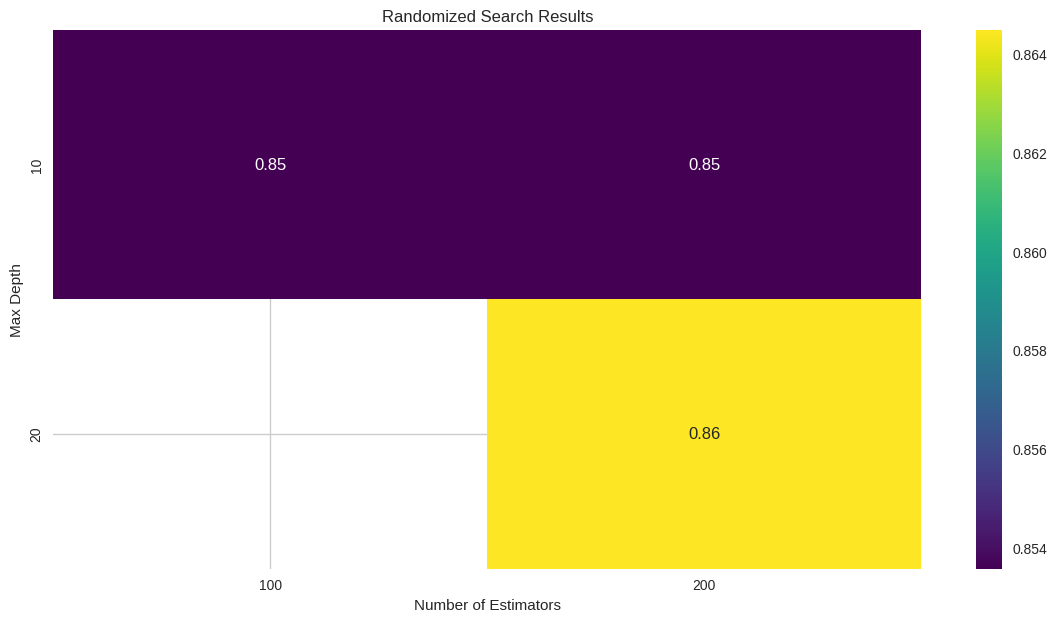

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Encode categorical features
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to search
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=20, cv=3, n_jobs=-1, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

# Make predictions
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot feature importance
importances = random_search.best_estimator_.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
sns.barplot(x=importances[indices], y=features[indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Plot hyperparameter tuning results
results = pd.DataFrame(random_search.cv_results_)
results = results[['param_n_estimators', 'param_max_features', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

# Sort by mean test score
results = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(14, 7))
sns.heatmap(results.pivot_table(index='param_max_depth', columns='param_n_estimators', values='mean_test_score'), annot=True, cmap='viridis')
plt.title('Randomized Search Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Max Depth')
plt.show()
